Goal: combine the % methylation files for each biorep into a single doc 

In [1]:
import os 
import pandas as pd
import sys
import glob
import numpy as np 
import seaborn as sns

In [4]:
#load the file paths
CHG=glob.glob('/global/scratch/users/chandlersutherland/e16/*/em/bedGraph_highcov/CHG*_per_exon_met_*.tsv')
CHH=glob.glob('/global/scratch/users/chandlersutherland/e16/*/em/bedGraph_highcov/CHH*_per_exon_*.tsv')
CpG=glob.glob('/global/scratch/users/chandlersutherland/e16/*/em/bedGraph_highcov/CpG*_per_exon_*.tsv')

print("there are ", len(CHG), 'CHG files, ', len(CHH), ' CHH files, and ', len(CpG), 'CpG files')

there are  51 CHG files,  42  CHH files, and  41 CpG files


In [5]:
CHG_meth=pd.DataFrame()

for i in range(0, len(CHG)):
    accession=CHG[i].split('/')[6]
    rep=CHG[i].split('/')[-1].split('_')[2]

    meth=pd.read_csv(CHG[i], sep='\t', lineterminator='\n', names=['Chrom', 'name', 'meth_percentage', 'count'], header=1)
    meth['accession']=accession
    meth['rep']=rep
    
    CHG_meth=pd.concat([CHG_meth, meth])

CHG_meth
#when all finished, write out 

,Chrom,name,meth_percentage,count,accession,rep
0,chr1,Zm00018ab000010,0.088652,141,B97,ERR5347668
1,chr1,Zm00018ab000020,0.000000,49,B97,ERR5347668
2,chr1,Zm00018ab000030,74.269505,73,B97,ERR5347668
3,chr1,Zm00018ab000040,0.000000,16,B97,ERR5347668
4,chr1,Zm00018ab000060,67.427035,31,B97,ERR5347668
...,...,...,...,...,...,...
34135,scaf_82,Zm00024ab446990,53.333333,3,CML277,ERR5347686
34136,scaf_823,Zm00024ab452240,0.000000,5,CML277,ERR5347686
34137,scaf_856,Zm00024ab452260,80.000000,1,CML277,ERR5347686
34138,scaf_893,Zm00024ab452360,40.000000,1,CML277,ERR5347686


In [7]:
print(len(CHG_meth['accession'].unique()))
#CHG_meth=CHG_meth[CHG_meth['count']>40]
CHG_meth.to_csv('/global/scratch/users/chandlersutherland/e16/cs_reports/CHG_meth.tsv', sep='\t')

24


In [8]:
gene_table='/global/home/users/chandlersutherland/e16/Maize_NLRome_GeneTable.txt'
gene=pd.read_csv(gene_table,sep = '\t')
nlrs=gene['Gene'].str.split('_', expand=True).iloc[:,0].str.replace('ZM', 'Zm').str.replace('AB', 'ab').str.replace('EB', 'eb').unique()

nlr_meth=CHG_meth[CHG_meth['name'].isin(nlrs)]
nlr_meth

sub=gene.drop_duplicates(subset=['Gene'])
sub['name']=nlrs
sub=sub[['name', 'HV']]

CHG_nlr=pd.merge(nlr_meth, sub, on='name')

/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [16]:
print(len(CHG_nlr['accession'].unique()))
CHG_nlr.groupby('accession').size()

24


accession
B97       144
CML103     96
CML228    117
CML247    168
CML277    169
CML322    128
CML333    149
CML52     148
CML69     159
HP301      78
IL14H     103
KI11       67
KI3        91
KY21      106
M162W      85
M37W      117
MS71      109
NC350      73
NC358     138
OH43      104
OH7B      172
P39       153
TX303     135
TZI8       48
dtype: int64

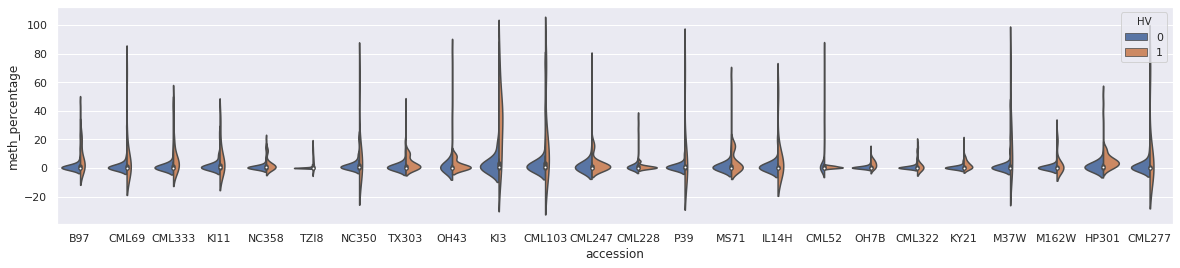

In [17]:
sns.set(rc={"figure.figsize":(20, 4)}) 
ax=sns.violinplot(data=CHG_nlr, x="accession", y="meth_percentage", hue="HV", split=True)
ax

In [24]:
CpG_meth=pd.DataFrame()

for i in range(0, len(CpG)):
    accession=CpG[i].split('/')[6]
    rep=CpG[i].split('/')[-1].split('_')[2]

    meth=pd.read_csv(CpG[i], sep='\t', lineterminator='\n', names=['Chrom', 'name', 'meth_percentage', 'count'], header=1)
    meth['accession']=accession
    meth['rep']=rep
    
    CpG_meth=pd.concat([CpG_meth, meth])

CpG_meth
#when all finished, write out 

,Chrom,name,meth_percentage,count,accession,rep
0,chr1,Zm00018ab000010,50.144141,34,B97,ERR5347668
1,chr1,Zm00018ab000020,0.000000,11,B97,ERR5347668
2,chr1,Zm00018ab000030,86.384921,15,B97,ERR5347668
3,chr1,Zm00018ab000040,0.000000,2,B97,ERR5347668
4,chr1,Zm00018ab000060,89.682540,3,B97,ERR5347668
...,...,...,...,...,...,...
19953,scaf_662,Zm00024ab451590,0.000000,5,CML277,ERR5347686
19954,scaf_75,Zm00024ab446700,0.000000,3,CML277,ERR5347686
19955,scaf_79,Zm00024ab446760,89.765135,36,CML277,ERR5347686
19956,scaf_802,Zm00024ab452180,0.000000,6,CML277,ERR5347686


In [19]:
#CpG_meth=CpG_meth[CpG_meth['count']>40]
#CpG_meth.to_csv('/global/scratch/users/chandlersutherland/e16/cs_reports/CpG_meth.tsv', sep='\t')
#CpG_meth[CpG_meth['accession']=="B73"]

#list(set(CHG_meth['accession'].unique()) - set(CpG_meth['accession'].unique()))

In [25]:
CpG_nlr_meth=CpG_meth[CpG_meth['name'].isin(nlrs)]
CpG_nlr_meth

CpG_nlr=pd.merge(CpG_nlr_meth, sub, on='name')
CpG_nlr

,Chrom,name,meth_percentage,count,accession,rep,HV
0,chr1,Zm00018ab011400,0.173993,156,B97,ERR5347668,0
1,chr1,Zm00018ab016280,0.319444,90,B97,ERR5347668,0
2,chr1,Zm00018ab016280,0.000000,10,B97,B97,0
3,chr1,Zm00018ab025360,0.000000,2,B97,ERR5347668,0
4,chr1,Zm00018ab032210,0.207431,88,B97,ERR5347668,0
...,...,...,...,...,...,...,...
2689,chr8,Zm00024ab346590,0.000000,6,CML277,ERR5347686,0
2690,chr8,Zm00024ab356910,30.690476,15,CML277,ERR5347686,0
2691,chr8,Zm00024ab371990,0.000000,12,CML277,ERR5347686,0
2692,chr9,Zm00024ab385090,91.238095,5,CML277,ERR5347686,0


In [27]:
CpG_nlr.groupby('accession').size()
#CpG_nlr.to_csv('/global/scratch/users/chandlersutherland/e16/cs_reports/CpG_meth_nlr.tsv', sep='\t')

accession
B97       173
CML103    117
CML228    128
CML247    183
CML277    174
CML322    148
CML333    168
CML52     166
CML69     177
HP301     103
IL14H     120
KI11       80
KY21      143
M162W     106
M37W      146
MS71      139
NC350      93
NC358     166
P39       164
dtype: int64

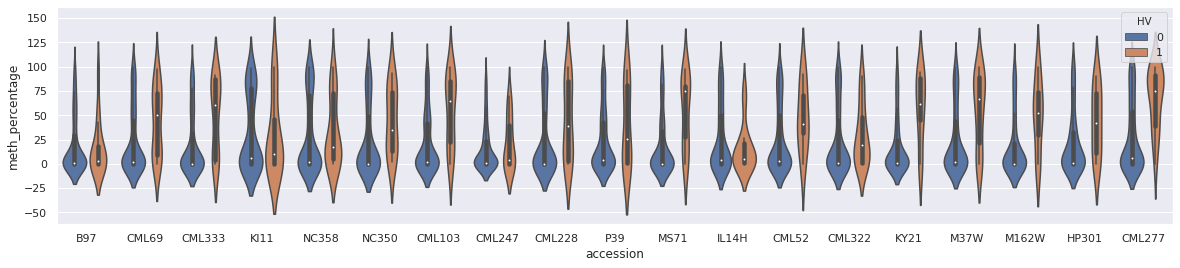

In [28]:
#sns.set(rc={"figure.figsize":(20, 4)}) 
ax=sns.violinplot(data=CpG_nlr, x="accession", y="meth_percentage", hue="HV", split=False)
#sns.violinplot(data=CHG_nlr, x="HV", y="meth_percentage")
#ax.set(ylim=(0, 100))
ax

In [57]:
CHH_meth=pd.DataFrame()

for i in range(0, len(CHH)):
    accession=CHH[i].split('/')[6]
    rep=CHH[i].split('/')[-1].split('_')[2]

    meth=pd.read_csv(CHH[i], sep='\t', lineterminator='\n', names=['Chrom', 'name', 'meth_percentage', 'count'], header=1)
    meth['accession']=accession
    meth['rep']=rep
    
    CHH_meth=pd.concat([CHH_meth, meth])

CHH_meth
#when all finished, write out 
CHH_meth.to_csv('/global/scratch/users/chandlersutherland/e16/cs_reports/CHH_meth.tsv', sep='\t')

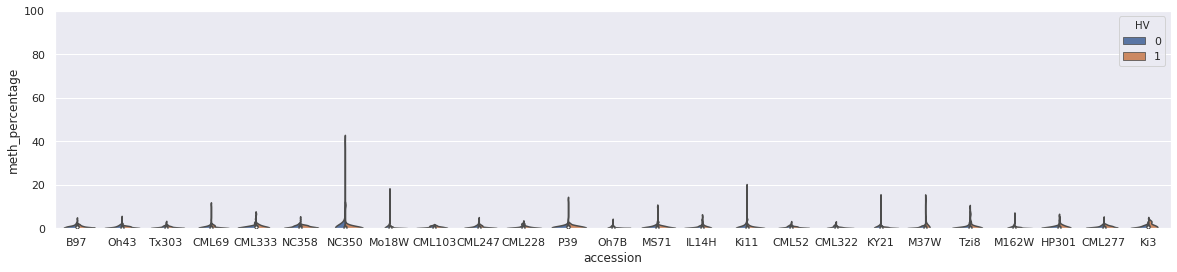

In [58]:
CHH_nlr_meth=CHH_meth[CHH_meth['name'].isin(nlrs)]
CHH_nlr_meth

CHH_nlr=pd.merge(CHH_nlr_meth, sub, on='name')
CHH_nlr

ax=sns.violinplot(data=CHH_nlr, x="accession", y="meth_percentage", hue="HV", split=True)
#sns.violinplot(data=CHG_nlr, x="HV", y="meth_percentage")
ax.set(ylim=(0, 100))
ax

In [59]:
#create an NLR only df 
CHG_nlr=CHG_nlr.rename(columns={'meth_percentage':'CHG'})
CHH_nlr=CHH_nlr.rename(columns={'meth_percentage':'CHH'})
CpG_nlr=CpG_nlr.rename(columns={'meth_percentage':'CpG'})

max(len(CHG_nlr), len(CHH_nlr), len(CpG_nlr))

CpG_nlr
CHH_nlr
#CHG_nlr

,Chrom,name,CHH,count,accession,rep,HV
0,chr1,Zm00018ab011400,0.658504,949,B97,ERR5347668,0
1,chr1,Zm00018ab011400,4.444444,108,B97,B97,0
2,chr1,Zm00018ab016280,0.676756,1014,B97,ERR5347668,0
3,chr1,Zm00018ab016280,1.359483,634,B97,B97,0
4,chr1,Zm00018ab025360,0.389884,1029,B97,ERR5347668,0
...,...,...,...,...,...,...,...
3261,chr3,Zm00029ab155870,0.000000,52,Ki3,ERR5347703,0
3262,chr3,Zm00029ab155870,0.000000,4,Ki3,ERR5347702,0
3263,chr3,Zm00029ab156250,0.219179,579,Ki3,ERR5347703,0
3264,chr3,Zm00029ab156250,0.000000,18,Ki3,ERR5347702,0


In [61]:
half=pd.merge(CHG_nlr, CHH_nlr, how='outer', on=['Chrom', 'name', 'accession', 'rep', 'HV'])
nlr_meth=pd.merge(half, CpG_nlr, how='outer', on=['Chrom', 'name', 'accession', 'rep', 'HV']).drop(['count_x', 'count_y', 'count'], axis=1)
nlr_meth=nlr_meth[['Chrom', 'accession', 'rep', 'HV', 'name', 'CpG', 'CHH', 'CHG']]
nlr_meth
nlr_meth.to_csv('/global/scratch/users/chandlersutherland/e16/cs_reports/nlr_meth.tsv', sep='\t')